In [81]:
import pandas as pd 
import matplotlib.pyplot as plt

In [82]:
df = pd.read_csv('MD17_Energy.csv')

# Removing l=0,1,2 from NequIP and taking the best model with l=3
df.drop('NequIP(l=0)', axis=1, inplace=True)
df.drop('NequIP(l=1)', axis=1, inplace=True)
df.drop('NequIP(l=2)', axis=1, inplace=True)

# No energy validation data
df.drop('GemNet(Q)', axis=1, inplace=True)
df.drop('GemNet(T)', axis=1, inplace=True)

df.head()

,MD17_molecules,SchNet,DimeNet,PhysNet,PaiNN(F),PaiNN(F+E),ENINet,SpookyNet,NequIP(l=3),MACE,NewtonNet,Allegro,SO3krates,FCHL19,GAP(SOAP),sGDML
0,Aspirin,0.37,0.204,0.23,0.167,0.159,0.148,0.151,0.053,0.051,0.168,0.053,0.139,0.182,0.408,0.19
1,Azobenzene,x,x,x,x,x,x,x,0.016,0.028,0.142,0.028,x,x,0.196,0.092
2,Benzene,0.08,0.078,x,x,x,0.074,x,0.001,0.009,x,0.007,x,x,0.017,x
3,Ethanol,0.08,0.064,0.059,0.064,0.063,0.043,0.052,0.009,0.009,0.078,0.009,0.052,0.054,0.081,0.07
4,Malondialdehyde,0.13,0.104,0.094,0.1,0.091,0.071,0.079,0.018,0.018,0.096,0.014,0.077,0.081,0.111,0.1


In [83]:
colors = {
    'SchNet':      '#1f77b4',  # muted blue
    'DimeNet':     '#d62728',  # safety orange
    'PhysNet':     '#8c6d31',  # cooked asparagus green
    'GemNet(Q)':   '#843c39',  # brick red
    'GemNet(T)':   '#8c564b',  # muted purple
    'PaiNN(F)':    '#5254a3',  # chestnut brown
    'PaiNN(F+E)':  '#7f7f7f',  # raspberry yogurt pink
    'ENINet':      '#e377c2',  # middle gray
    'SpookyNet':   '#bcbd22',  # curry yellow-green
    'NequIP(l=0)': '#2ca02c',  # blue-teal
    'NequIP(l=1)': '#393b79',  # dark muted blue
    'NequIP(l=2)': 'red',      # '637939',  # olive green
    'NequIP(l=3)': '#17becf',  # dark mustard
    'MACE':        '#ff7f0e',  # dark brick red
    'NewtonNet':   '#7b4173',  # dark purple
    'Allegro':     '#9467bd',  # soft blue
    'SO3krates':   '#6b6ecf',  # soft purple
    'FCHL19':      '#9c9ede',  # light lavender
    'GAP(SOAP)':   '#8ca252',  # light olive green
    'sGDML':       '#b5cf6b',  # pastel green
}

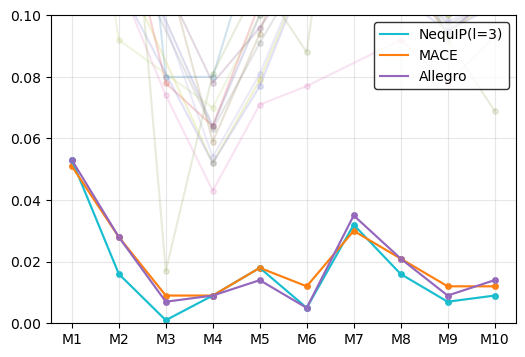

In [84]:
fig,ax = plt.subplots(figsize=(6,4))

x = [0,1,2,3,4,5,6,7,8,9]
mae_cutoff = 0.1 # kcal/mol

for i_col in range(1,len(df.columns)):

    column = df.iloc[:, i_col]        
    column_name = df.columns[i_col]   

    x_new = []
    y_new = []

    for i in range(len(x)):
        if column[i] != 'x': 
            x_new.append(x[i])
            y_new.append(float(column[i]))

    if all(y <= mae_cutoff for y in y_new):
        ax.plot(x_new,y_new,label=column_name,color=colors[column_name],alpha=1)
        ax.scatter(x_new,y_new,color=colors[column_name],s=15)
    if any(y <= mae_cutoff for y in y_new):
        ax.plot(x_new,y_new,color=colors[column_name],alpha=0.2)
        ax.scatter(x_new,y_new,color=colors[column_name],s=15,alpha=0.2)

ax.set_ylim([0,mae_cutoff])

ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_xticklabels(['M1','M2','M3','M4','M5','M6','M7','M8','M9','M10',])

ax.legend(edgecolor='black',facecolor='white',loc='upper right')
ax.grid(alpha=0.3)
plt.show()